<a href="https://www.kaggle.com/code/rajatraj0502/linkedin-professional-profiles-dataset?scriptVersionId=141350764" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/linkedinuserprofiles/LinkedIn people profiles datasets.csv


In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/linkedinuserprofiles/LinkedIn people profiles datasets.csv')

# Display the first few rows of the dataframe
df.head()


timestamp                            id  \
0  2023-01-10            catherinemcilkenny   
1  2022-12-17           margot-bon-51a04624   
2  2023-05-17            mike-dean-8509a193   
3  2022-05-29  giovanna-panarella-99a0a4167   
4  2022-12-06         steve-latimer-3364327   

                                     name                       city  \
0  Catherine Fitzpatrick (McIlkenny), B.A                     Canada   
1                              Margot Bon  The Randstad, Netherlands   
2                               Mike Dean    England, United Kingdom   
3                      Giovanna Panarella  Avellino, Campania, Italy   
4                           Steve Latimer            Ontario, Canada   

  country_code region     current_company:company_id  \
0           CA    NaN                            NaN   
1           NL     EU               gemeente-utrecht   
2           UK    NaN                   network-rail   
3           IT     EU                            NaN   
4           CA    NaN  mid-range-computer-group-inc.   

            current_company:name  \
0                            NaN   
1               Gemeente Utrecht   
2                   Network Rail   
3                      Freelance   
4  Mid-Range Computer Group Inc.   

                                            position  following  ...  \
0  Snr Business Analyst at Emploi et Développemen...        NaN  ...   
1  Communicatieadviseur Corporate & Strategie Gem...        NaN  ...   
2               Network Data Manager at Network Rail        NaN  ...   
3                             Architetto (Freelance)      500.0  ...   
4  Senior Account Executive at Mid-Range Computer...        NaN  ...   

                                  people_also_viewed  \
0  [{"profile_link":"https://ca.linkedin.com/in/l...   
1  [{"profile_link":"https://nl.linkedin.com/in/j...   
2  [{"profile_link":"https://uk.linkedin.com/in/g...   
3  [{"profile_link":"https://it.linkedin.com/in/e...   
4  [{"profile_link":"https://ca.linkedin.com/in/d...   

             educations_details  \
0    Queen's University Belfast   
1                           NaN   
2          Brighton Polytechnic   
3        Università di Camerino   
4  St. Michael's College School   

                                           education  \
0  [{"degree":"Bachelor of Arts (B.A.) Honours","...   
1  [{"degree":"Scrum en Agile werken","end_year":...   
2  [{"degree":"2:2","end_year":"1991","field":"El...   
3  [{"degree":"“Corso di aggiornamento profession...   
4  [{"degree":"","end_year":"1978","field":"","me...   

                                              avatar  \
0  https://media.licdn.com/dms/image/C4E03AQEcz_j...   
1  https://static.licdn.com/sc/h/244xhbkr7g40x6bs...   
2  https://media.licdn.com/dms/image/C4D03AQHLj-Z...   
3  https://media-exp1.licdn.com/dms/image/C4D03AQ...   
4                                                NaN   

                                           languages  \
0                                                NaN   
1  [{"subtitle":"Professional working proficiency...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                      certifications  \
0                                                NaN   
1  [{"meta":"Issued Jun 2013","subtitle":"Van der...   
2                                                NaN   
3                                                NaN   
4  [{"meta":"Issued Jan 2022 See credential","sub...   

                                     recommendations recommendations_count  \
0                                                NaN                   NaN   
1  Menno H. Poort “Ik werk al jaren prettig met M...                   2.0   
2                                                NaN                   NaN   
3                                                NaN                   NaN   
4  Blake Reeves

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


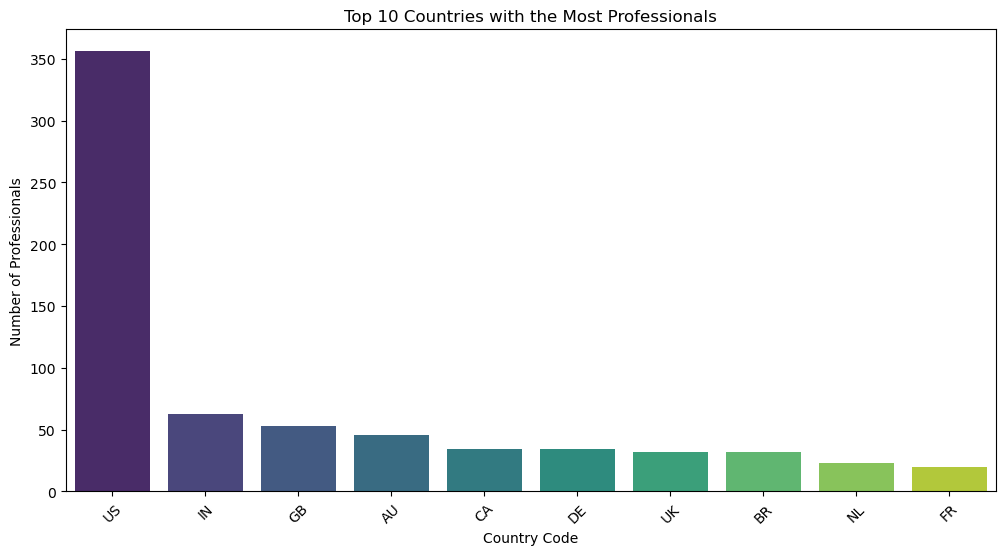

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows where 'country_code' is NaN
df_country = df.dropna(subset=['country_code'])

# Get the top 10 countries with the most professionals
top_countries = df_country['country_code'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Countries with the Most Professionals')
plt.xlabel('Country Code')
plt.ylabel('Number of Professionals')
plt.xticks(rotation=45)
plt.show()


**Here is a bar plot of the top 10 countries with the most professionals. The country codes on the x-axis represent the countries, and the y-axis represents the number of professionals.**

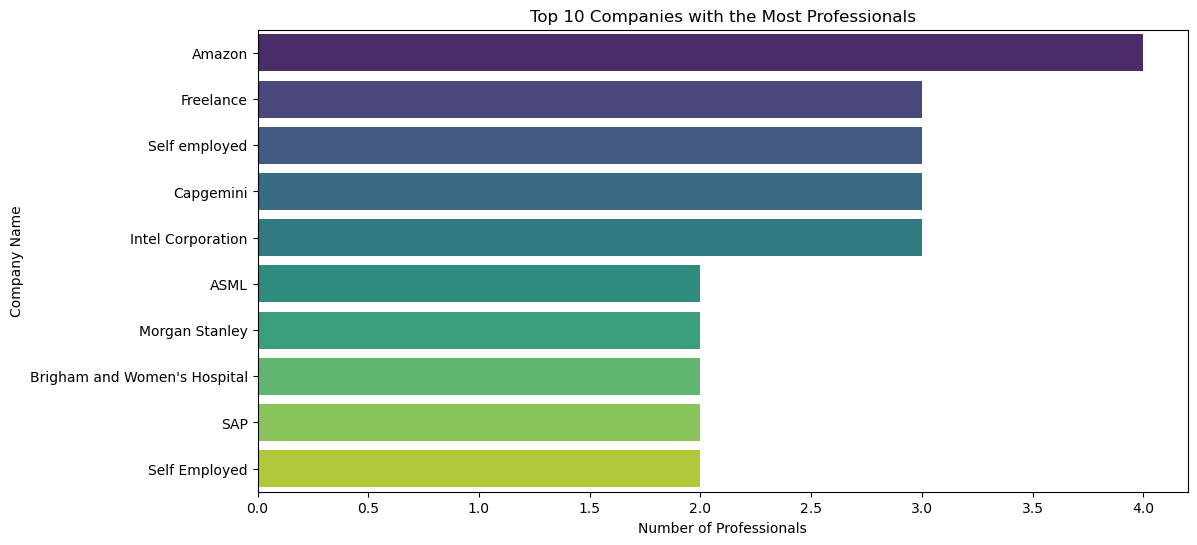

In [4]:
# Drop rows where 'current_company:name' is NaN
df_company = df.dropna(subset=['current_company:name'])

# Get the top 10 companies with the most professionals
top_companies = df_company['current_company:name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_companies.index, x=top_companies.values, palette='viridis')
plt.title('Top 10 Companies with the Most Professionals')
plt.xlabel('Number of Professionals')
plt.ylabel('Company Name')
plt.show()


**Here is a bar plot of the top 10 companies with the most professionals. The company names on the y-axis represent the companies, and the x-axis represents the number of professionals.**

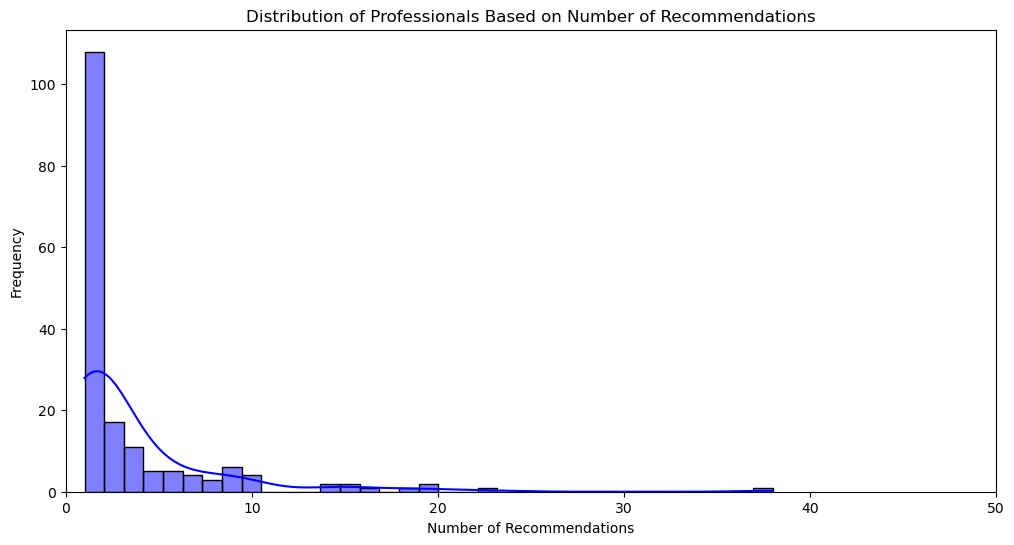

In [5]:
# Drop rows where 'recommendations_count' is NaN
df_recommendations = df.dropna(subset=['recommendations_count'])

plt.figure(figsize=(12, 6))
sns.histplot(df_recommendations['recommendations_count'], kde=True, color='b')
plt.title('Distribution of Professionals Based on Number of Recommendations')
plt.xlabel('Number of Recommendations')
plt.ylabel('Frequency')
plt.xlim(0, 50)  # Limit x-axis to 50 as there are some outliers with a very high number of recommendations
plt.show()


**Here is a histogram of the distribution of professionals based on the number of recommendations received. The x-axis represents the number of recommendations, and the y-axis represents the frequency of professionals.**

> Most professionals have received less than 10 recommendations, with the distribution being heavily right-skewed.

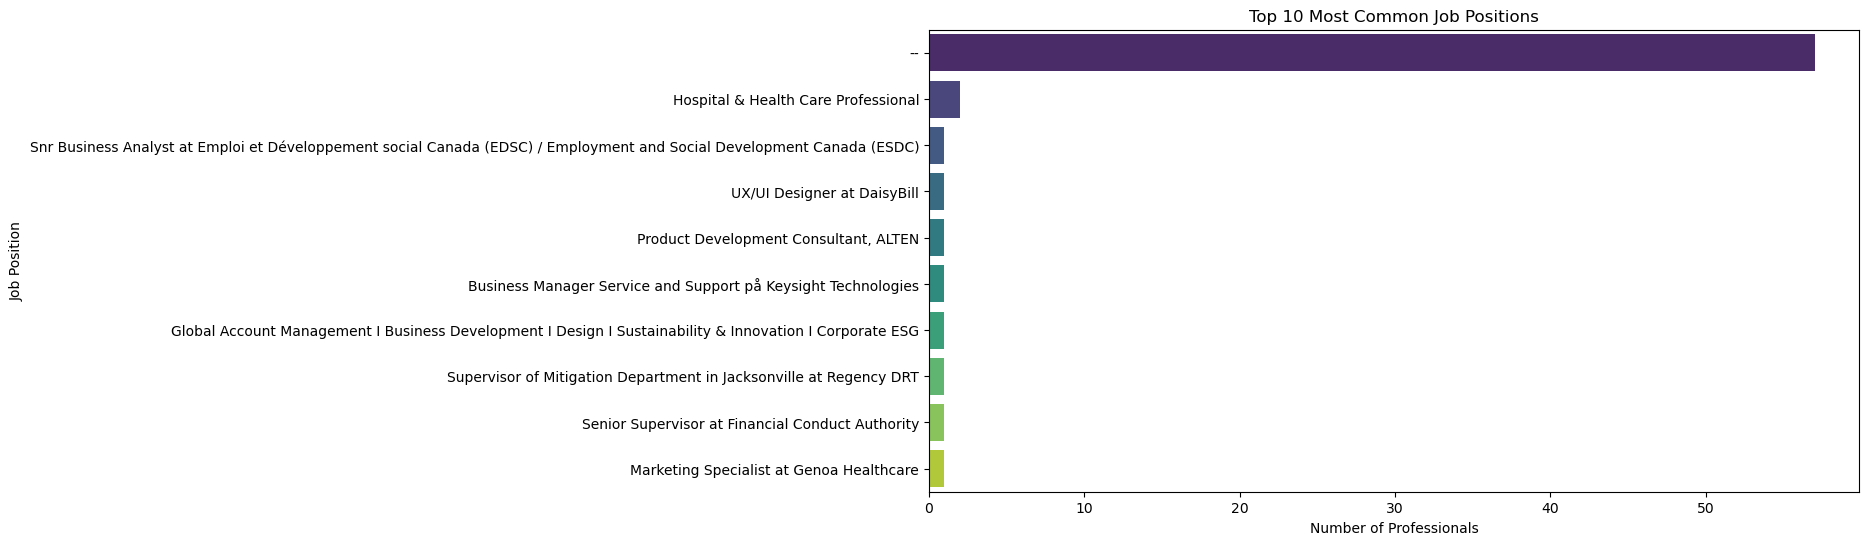

In [6]:
# Drop rows where 'position' is NaN
df_position = df.dropna(subset=['position'])

# Get the top 10 most common job positions
top_positions = df_position['position'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_positions.index, x=top_positions.values, palette='viridis')
plt.title('Top 10 Most Common Job Positions')
plt.xlabel('Number of Professionals')
plt.ylabel('Job Position')
plt.show()


**Here is a bar plot of the top 10 most common job positions among the professionals in the dataset. The job positions on the y-axis represent the positions, and the x-axis represents the number of professionals.**

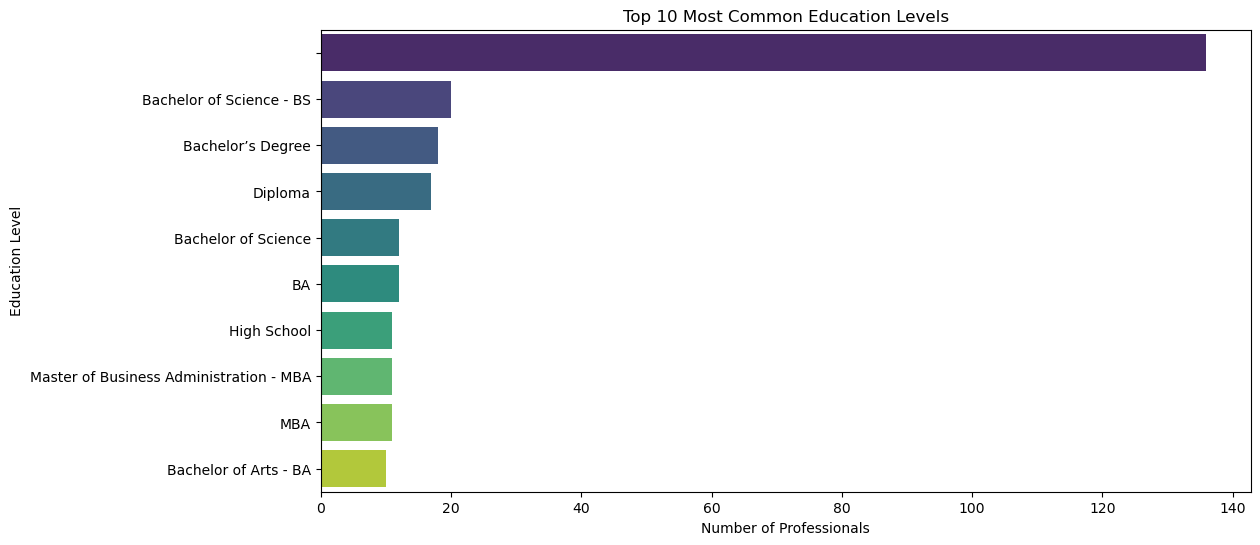

In [7]:
import json

# Drop rows where 'education' is NaN
df_education = df.dropna(subset=['education'])

# Function to extract education levels from 'education' column
def extract_education_levels(education_str):
    try:
        education_list = json.loads(education_str.replace("'", '"'))
        return [edu['degree'] for edu in education_list if 'degree' in edu]
    except:
        return []

# Extract education levels and create a list of all education levels
all_education_levels = []
for education_str in df_education['education']:
    all_education_levels.extend(extract_education_levels(education_str))

# Get the top 10 most common education levels
top_education_levels = pd.Series(all_education_levels).value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_education_levels.index, x=top_education_levels.values, palette='viridis')
plt.title('Top 10 Most Common Education Levels')
plt.xlabel('Number of Professionals')
plt.ylabel('Education Level')
plt.show()


**Here is a bar plot of the top 10 most common education levels among the professionals in the dataset. The education levels on the y-axis represent the levels, and the x-axis represents the number of professionals.**

In [8]:
# Drop unnecessary columns
columns_to_drop = ['timestamp', 'id', 'region', 'current_company:company_id', 'people_also_viewed',
                    'avatar', 'recommendations', 'recommendations_count', 'volunteer_experience', 'сourses',
                    'following', 'groups', 'certifications']
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

# Drop rows with missing values in 'current_company:name' and 'position'
df_cleaned = df_cleaned.dropna(subset=['current_company:name', 'position'])

# Reset index
df_cleaned = df_cleaned.reset_index(drop=True)

df_cleaned.head()


name                                city country_code  \
0          Margot Bon           The Randstad, Netherlands           NL   
1           Mike Dean             England, United Kingdom           UK   
2  Giovanna Panarella           Avellino, Campania, Italy           IT   
3       Steve Latimer                     Ontario, Canada           CA   
4        Manuela Dias  Madrid, Community of Madrid, Spain           ES   

            current_company:name  \
0               Gemeente Utrecht   
1                   Network Rail   
2                      Freelance   
3  Mid-Range Computer Group Inc.   
4                       Ericsson   

                                            position  \
0  Communicatieadviseur Corporate & Strategie Gem...   
1               Network Data Manager at Network Rail   
2                             Architetto (Freelance)   
3  Senior Account Executive at Mid-Range Computer...   
4  Operational Excellence & Internal Control Mana...   

                                               about  \
0  Allround Marketing & Communicatie Adviseur met...   
1  Experienced Data Manager with a demonstrated h...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                               posts  \
0  [{"attribution":"Liked by Margot Bon","img":"h...   
1                                                NaN   
2  [{"attribution":"Liked by Giovanna Panarella",...   
3  [{"attribution":"Liked by Steve Latimer","link...   
4                                                NaN   

                                     current_company  \
0  {"company_id":"gemeente-utrecht","industry":"G...   
1  {"company_id":"network-rail","link":"https://s...   
2                   {"link":null,"name":"Freelance"}   
3  {"company_id":"mid-range-computer-group-inc.",...   
4  {"company_id":"ericsson","industry":"IT Servic...   

                                          experience  \
0  [{"company":"Gemeente Utrecht","company_id":"g...   
1  [{"company":"Network Rail","company_id":"netwo...   
2  [{"company":"Freelance","company_id":null,"loc...   
3  [{"company":"Mid-Range Computer Group Inc.","c...   
4  [{"company":"Ericsson","company_id":"ericsson"...   

                                                 url  \
0    https://www.linkedin.com/in/margot-bon-51a04624   
1     https://www.linkedin.com/in/mike-dean-8509a193   
2  https://www.linkedin.com/in/giovanna-panarella...   
3  https://www.linkedin.com/in/steve-latimer-3364327   
4  https://www.linkedin.com/in/manuela-dias-b868b29b   

             educations_details  \
0                           NaN   
1          Brighton Polytechnic   
2        Università di Camerino   
3  St. Michael's College School   
4                           NaN   

                                           education  \
0  [{"degree":"Scrum en Agile werken","end_year":...   
1  [{"degree":"2:2","end_year":"1991","field":"El...   
2  [{"degree":"“Corso di aggiornamento profession...   
3  [{"degree":"","end_year":"1978","field":"","me...   
4                                                NaN   

                                           languages  
0  [{"subtitle":"Professional working proficiency...  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4  [{"subtitle":"-","title":"Español"},{"subtitle...

In [9]:
import plotly.express as px

# Get the top 10 most common job positions
top_positions = df_cleaned['position'].value_counts().head(10)

# Create interactive bar plot
fig = px.bar(
    x=top_positions.index,
    y=top_positions.values,
    labels={'x': 'Job Position', 'y': 'Number of Professionals'},
    title='Top 10 Most Common Job Positions'
)

fig.update_traces(marker_color='rgba(0, 100, 80, 0.6)', marker_line_color='rgba(0, 100, 80, 1)', marker_line_width=1.5)
fig.update_layout(xaxis_title='Job Position', yaxis_title='Number of Professionals', title_x=0.5, template='plotly_white')
fig.update_xaxes(tickangle=45)

fig.show()


In [10]:
# Get the top 10 companies with the most professionals
top_companies = df_cleaned['current_company:name'].value_counts().head(10)

# Create interactive bar plot
fig = px.bar(
    x=top_companies.index,
    y=top_companies.values,
    labels={'x': 'Company', 'y': 'Number of Professionals'},
    title='Top 10 Companies with the Most Professionals'
)

fig.update_traces(marker_color='rgba(0, 100, 80, 0.6)', marker_line_color='rgba(0, 100, 80, 1)', marker_line_width=1.5)
fig.update_layout(xaxis_title='Company', yaxis_title='Number of Professionals', title_x=0.5, template='plotly_white')
fig.update_xaxes(tickangle=45)

fig.show()


In [11]:
# Extract relevant information from 'experience', 'education', and 'languages'

# Function to extract start and end year from 'experience' and 'education'
def extract_start_end_year(json_str):
    try:
        json_list = json.loads(json_str.replace("'", '"'))
        start_years = []
        end_years = []
        for item in json_list:
            start_years.append(item.get('start_year', None))
            end_years.append(item.get('end_year', None))
        return start_years, end_years
    except:
        return [], []

# Modified function to extract languages from 'languages'
def extract_languages(json_str):
    try:
        json_list = json.loads(json_str.replace("'", '"'))
        return [lang['title'] for lang in json_list if 'title' in lang]
    except:
        return []

# Extract start and end years of experiences and educations, and extract languages
df_cleaned['experience_start_years'], df_cleaned['experience_end_years'] = zip(*df_cleaned['experience'].apply(extract_start_end_year))
df_cleaned['education_start_years'], df_cleaned['education_end_years'] = zip(*df_cleaned['education'].apply(extract_start_end_year))
df_cleaned['languages'] = df_cleaned['languages'].apply(extract_languages)

df_cleaned.head()


name                                city country_code  \
0          Margot Bon           The Randstad, Netherlands           NL   
1           Mike Dean             England, United Kingdom           UK   
2  Giovanna Panarella           Avellino, Campania, Italy           IT   
3       Steve Latimer                     Ontario, Canada           CA   
4        Manuela Dias  Madrid, Community of Madrid, Spain           ES   

            current_company:name  \
0               Gemeente Utrecht   
1                   Network Rail   
2                      Freelance   
3  Mid-Range Computer Group Inc.   
4                       Ericsson   

                                            position  \
0  Communicatieadviseur Corporate & Strategie Gem...   
1               Network Data Manager at Network Rail   
2                             Architetto (Freelance)   
3  Senior Account Executive at Mid-Range Computer...   
4  Operational Excellence & Internal Control Mana...   

                                               about  \
0  Allround Marketing & Communicatie Adviseur met...   
1  Experienced Data Manager with a demonstrated h...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                               posts  \
0  [{"attribution":"Liked by Margot Bon","img":"h...   
1                                                NaN   
2  [{"attribution":"Liked by Giovanna Panarella",...   
3  [{"attribution":"Liked by Steve Latimer","link...   
4                                                NaN   

                                     current_company  \
0  {"company_id":"gemeente-utrecht","industry":"G...   
1  {"company_id":"network-rail","link":"https://s...   
2                   {"link":null,"name":"Freelance"}   
3  {"company_id":"mid-range-computer-group-inc.",...   
4  {"company_id":"ericsson","industry":"IT Servic...   

                                          experience  \
0  [{"company":"Gemeente Utrecht","company_id":"g...   
1  [{"company":"Network Rail","company_id":"netwo...   
2  [{"company":"Freelance","company_id":null,"loc...   
3  [{"company":"Mid-Range Computer Group Inc.","c...   
4  [{"company":"Ericsson","company_id":"ericsson"...   

                                                 url  \
0    https://www.linkedin.com/in/margot-bon-51a04624   
1     https://www.linkedin.com/in/mike-dean-8509a193   
2  https://www.linkedin.com/in/giovanna-panarella...   
3  https://www.linkedin.com/in/steve-latimer-3364327   
4  https://www.linkedin.com/in/manuela-dias-b868b29b   

             educations_details  \
0                           NaN   
1          Brighton Polytechnic   
2        Università di Camerino   
3  St. Michael's College School   
4                           NaN   

                                           education  \
0  [{"degree":"Scrum en Agile werken","end_year":...   
1  [{"degree":"2:2","end_year":"1991","field":"El...   
2  [{"degree":"“Corso di aggiornamento profession...   
3  [{"degree":"","end_year":"1978","field":"","me...   
4                                                NaN   

                                languages          experience_start_years  \
0        [English, German, French, Dutch]  [None, None, None, None, None]   
1                                      []              [None, None, None]   
2                                      []  [None, None, None, None, None]   
3                                      []                              []   
4  [Español, Inglés, Italiano, Portugués]                          [None]   

             experience_end_years education_start_years education_end_years  
0  [None, None, None, None, None]                    []                  []  
1              [None, None, None]                [1988]              [1991]  
2  [None, None, None, None, None]                    []                  []  
3         

In [12]:
# Create a new column for the number of languages spoken by each professional
df_cleaned['num_languages'] = df_cleaned['languages'].apply(len)

# Create interactive histogram
fig = px.histogram(
    df_cleaned,
    x='num_languages',
    labels={'num_languages': 'Number of Languages'},
    title='Distribution of Professionals Based on Number of Languages Spoken'
)

fig.update_layout(xaxis_title='Number of Languages', yaxis_title='Number of Professionals', title_x=0.5, template='plotly_white')

fig.show()


In [13]:
# Create a new column for the number of experiences of each professional
df_cleaned['num_experiences'] = df_cleaned['experience_start_years'].apply(len)

# Create interactive histogram
fig = px.histogram(
    df_cleaned,
    x='num_experiences',
    labels={'num_experiences': 'Number of Experiences'},
    title='Distribution of Professionals Based on Number of Experiences'
)

fig.update_layout(xaxis_title='Number of Experiences', yaxis_title='Number of Professionals', title_x=0.5, template='plotly_white')

fig.show()


In [14]:
# Create a new column for the number of educations of each professional
df_cleaned['num_educations'] = df_cleaned['education_start_years'].apply(len)

# Create interactive histogram
fig = px.histogram(
    df_cleaned,
    x='num_educations',
    labels={'num_educations': 'Number of Educations'},
    title='Distribution of Professionals Based on Number of Educations'
)

fig.update_layout(xaxis_title='Number of Educations', yaxis_title='Number of Professionals', title_x=0.5, template='plotly_white')

fig.show()


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 26862 (\N{CJK UNIFIED IDEOGRAPH-68EE}) missing from current font.

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 23713 (\N{CJK UNIFIED IDEOGRAPH-5CA1}) missing from current font.

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 31077 (\N{CJK UNIFIED IDEOGRAPH-7965}) missing from current font.

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 24428 (\N{CJK UNIFIED IDEOGRAPH-5F6C}) missing from current font.

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 39759 (\N{CJK UNIFIED IDEOGRAPH-9B4F}) missing from current font.

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 26195 (\N{CJK UNIFIED IDEOGRAPH-6653}) missing from current font.

/opt/conda/lib/python3.10/site-packages/IPytho

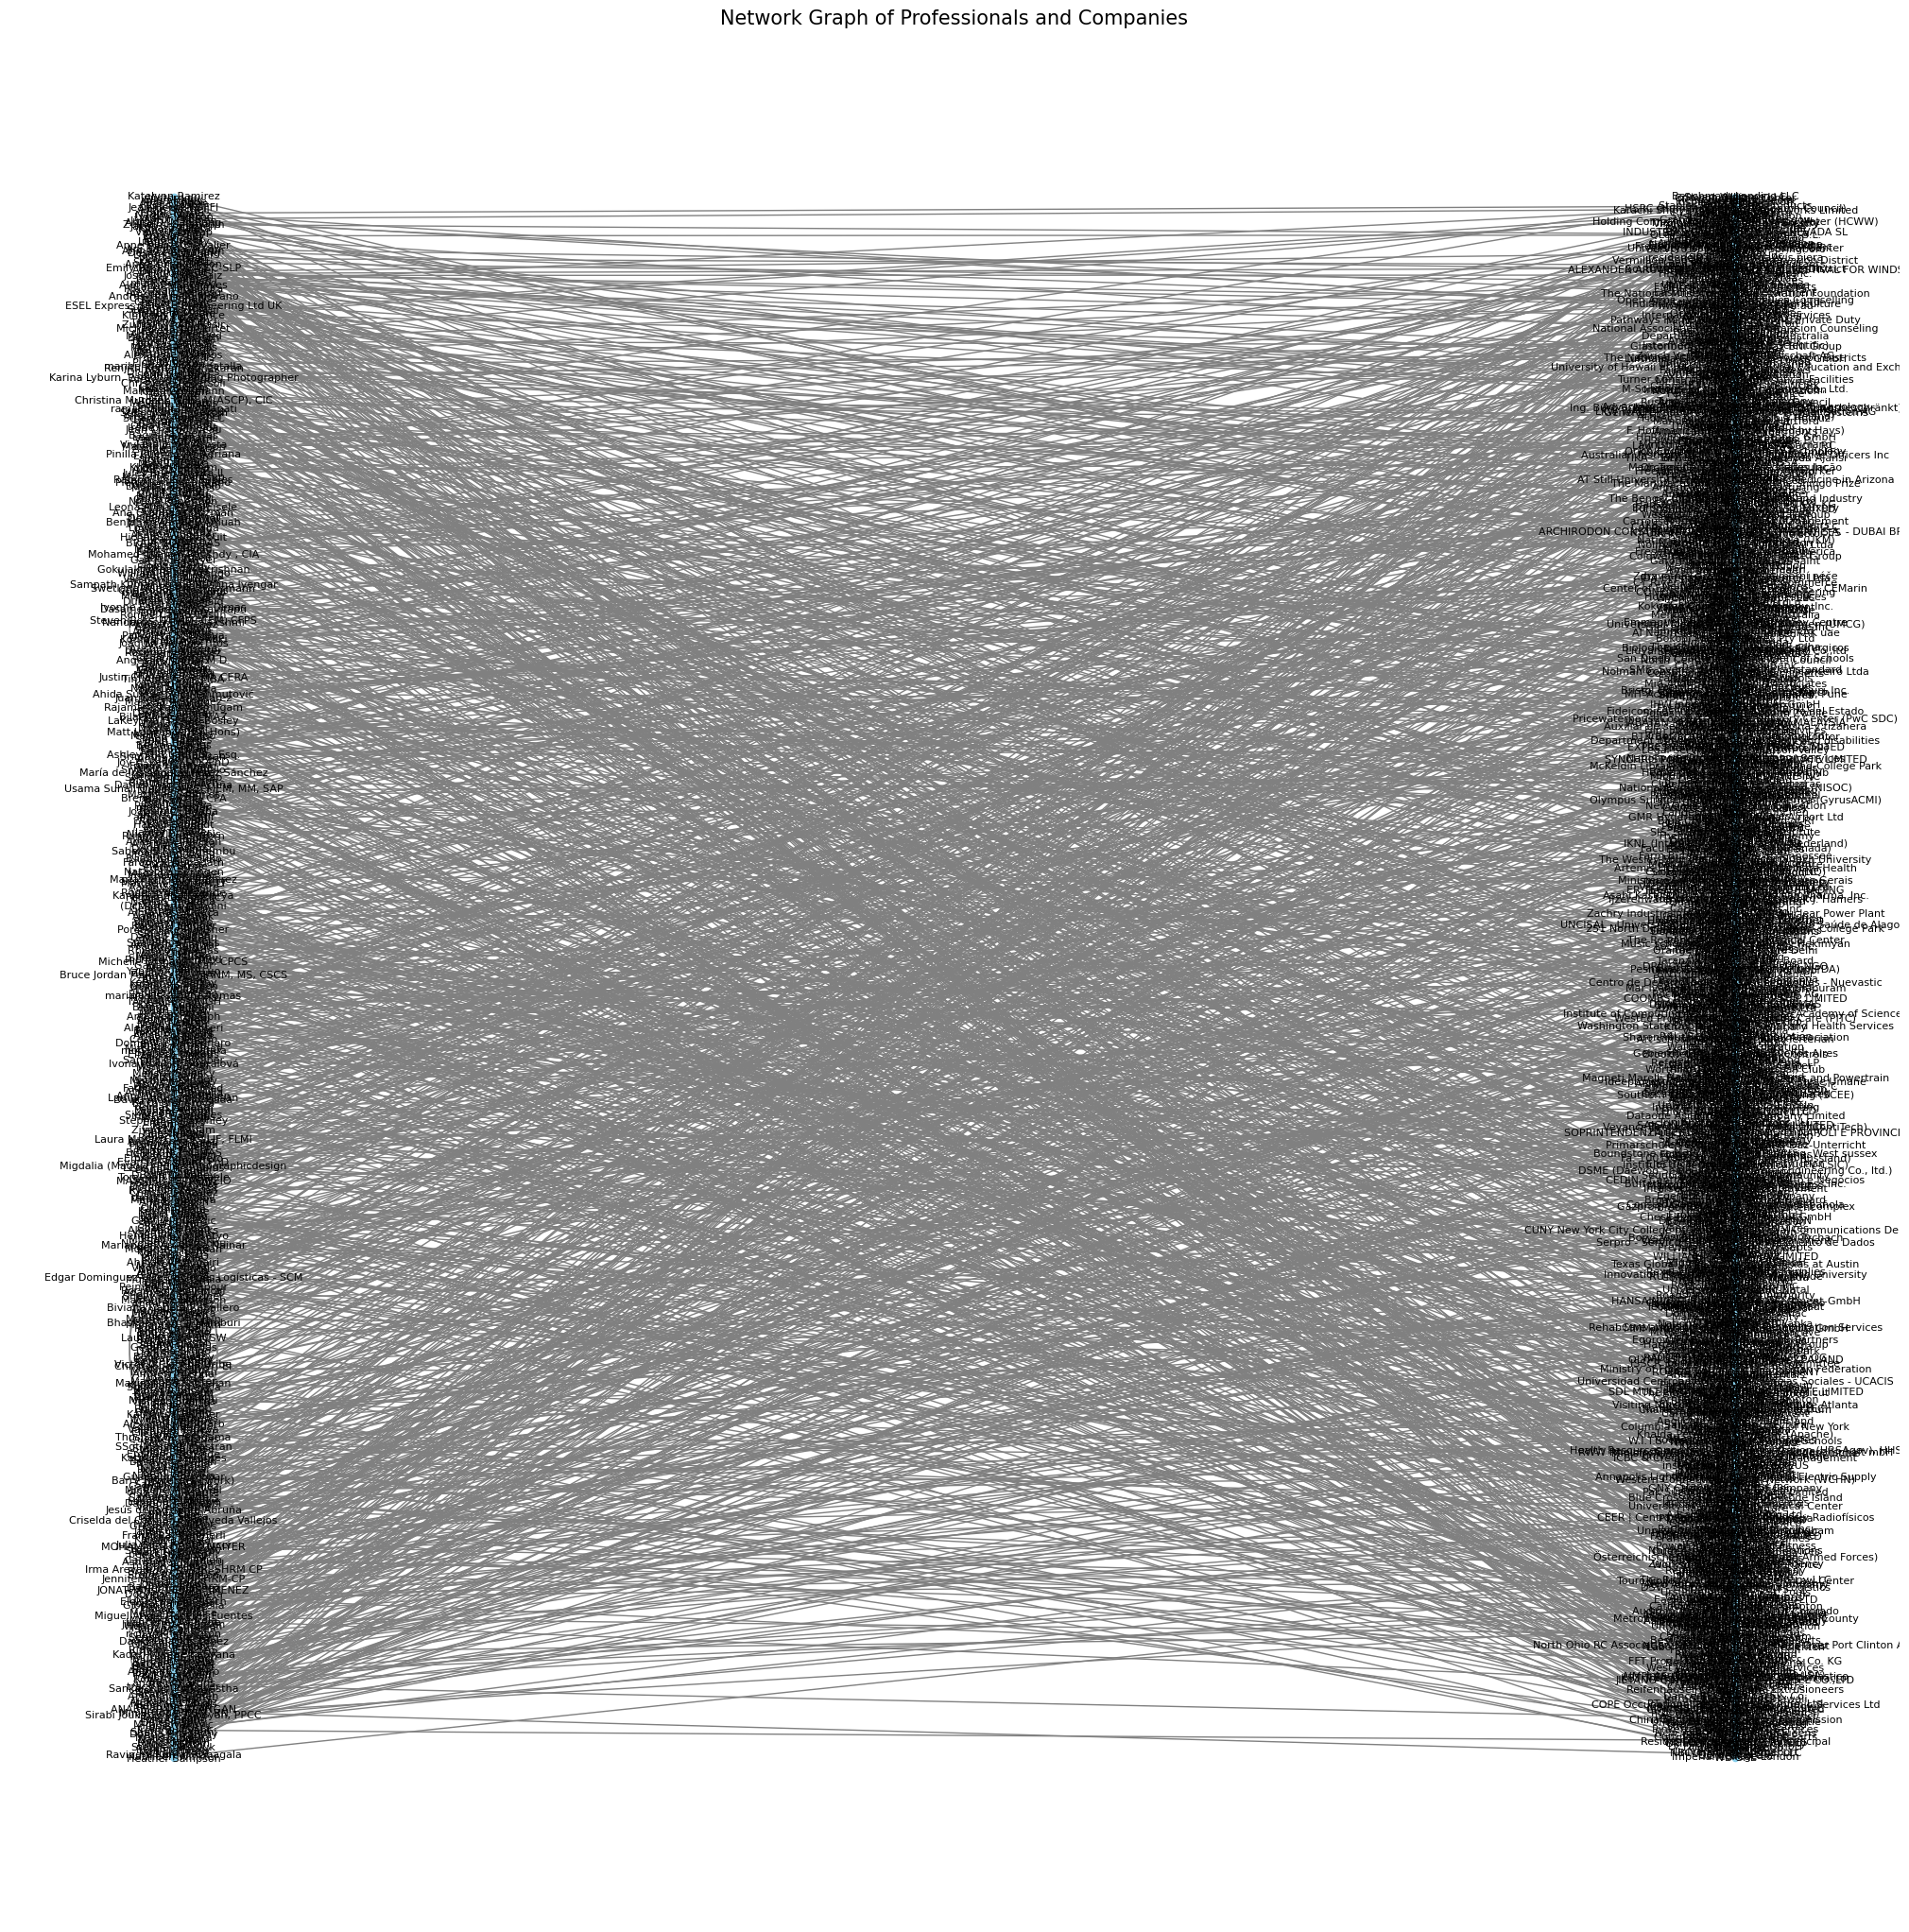

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Extract professionals and companies from the 'experience' column
def extract_professionals_companies(json_str):
    try:
        json_list = json.loads(json_str.replace("'", '"'))
        companies = [exp['company'] for exp in json_list if 'company' in exp]
        return companies
    except:
        return []

# Create a list of all professionals and companies
professionals = df_cleaned['name'].tolist()
companies = df_cleaned['experience'].apply(extract_professionals_companies).tolist()

# Create a bipartite graph
B = nx.Graph()
B.add_nodes_from(professionals, bipartite=0)
B.add_nodes_from([company for sublist in companies for company in sublist], bipartite=1)

# Add edges between professionals and companies
for professional, companies in zip(professionals, companies):
    for company in companies:
        B.add_edge(professional, company)

# Draw the bipartite graph
pos = nx.bipartite_layout(B, professionals)
plt.figure(figsize=(20, 20))
nx.draw(B, pos, with_labels=True, font_size=8, node_size=20, node_color='skyblue', font_color='black', edge_color='gray')
plt.title('Network Graph of Professionals and Companies', size=15)
plt.show()


**Network graph showing the connections between professionals and the companies they have worked for.**

In [16]:
# Fill missing values in 'about', 'posts', 'current_company', and 'educations_details' with placeholder text
df_cleaned['about'].fillna('No information available', inplace=True)
df_cleaned['posts'].fillna('No posts available', inplace=True)
df_cleaned['current_company'].fillna('No current company available', inplace=True)
df_cleaned['educations_details'].fillna('No education details available', inplace=True)
df_cleaned['languages'].fillna('[]', inplace=True)

# Function to extract company name from 'current_company'
def extract_current_company_name(json_str):
    try:
        json_dict = json.loads(json_str.replace("'", '"'))
        return json_dict.get('name', None)
    except:
        return None

# Function to extract list of companies from 'experience'
def extract_companies(json_str):
    try:
        json_list = json.loads(json_str.replace("'", '"'))
        return [exp['company'] for exp in json_list if 'company' in exp]
    except:
        return []

# Extract current company name, and list of companies from 'experience'
df_cleaned['current_company_name'] = df_cleaned['current_company'].apply(extract_current_company_name)
df_cleaned['companies'] = df_cleaned['experience'].apply(extract_companies)

# Drop original 'current_company' and 'experience' columns
df_cleaned.drop(columns=['current_company', 'experience'], inplace=True)

df_cleaned.head()


name                                city country_code  \
0          Margot Bon           The Randstad, Netherlands           NL   
1           Mike Dean             England, United Kingdom           UK   
2  Giovanna Panarella           Avellino, Campania, Italy           IT   
3       Steve Latimer                     Ontario, Canada           CA   
4        Manuela Dias  Madrid, Community of Madrid, Spain           ES   

            current_company:name  \
0               Gemeente Utrecht   
1                   Network Rail   
2                      Freelance   
3  Mid-Range Computer Group Inc.   
4                       Ericsson   

                                            position  \
0  Communicatieadviseur Corporate & Strategie Gem...   
1               Network Data Manager at Network Rail   
2                             Architetto (Freelance)   
3  Senior Account Executive at Mid-Range Computer...   
4  Operational Excellence & Internal Control Mana...   

                                               about  \
0  Allround Marketing & Communicatie Adviseur met...   
1  Experienced Data Manager with a demonstrated h...   
2                           No information available   
3                           No information available   
4                           No information available   

                                               posts  \
0  [{"attribution":"Liked by Margot Bon","img":"h...   
1                                 No posts available   
2  [{"attribution":"Liked by Giovanna Panarella",...   
3  [{"attribution":"Liked by Steve Latimer","link...   
4                                 No posts available   

                                                 url  \
0    https://www.linkedin.com/in/margot-bon-51a04624   
1     https://www.linkedin.com/in/mike-dean-8509a193   
2  https://www.linkedin.com/in/giovanna-panarella...   
3  https://www.linkedin.com/in/steve-latimer-3364327   
4  https://www.linkedin.com/in/manuela-dias-b868b29b   

               educations_details  \
0  No education details available   
1            Brighton Polytechnic   
2          Università di Camerino   
3    St. Michael's College School   
4  No education details available   

                                           education  \
0  [{"degree":"Scrum en Agile werken","end_year":...   
1  [{"degree":"2:2","end_year":"1991","field":"El...   
2  [{"degree":"“Corso di aggiornamento profession...   
3  [{"degree":"","end_year":"1978","field":"","me...   
4                                                NaN   

                                languages          experience_start_years  \
0        [English, German, French, Dutch]  [None, None, None, None, None]   
1                                      []              [None, None, None]   
2                                      []  [None, None, None, None, None]   
3                                      []                              []   
4  [Español, Inglés, Italiano, Portugués]                          [None]   

             experience_end_years education_start_years education_end_years  \
0  [None, None, None, None, None]                    []                  []   
1              [None, None, None]                [1988]              [1991]   
2  [None, None, None, None, None]                    []                  []   
3                              []                    []                  []   
4                          [None]                    []                  []   

   num_languages  num_experiences  num_educations  \
0              4                5               0   
1              0                3               1   
2              0                5               0   
3              0                0               0   
4              4                1               0   

            current_company_name  \
0               Gemeente Utrecht   
1                   Network Rail   
2                      Freelance   
3  Mid-Range Computer Group Inc.   
4         

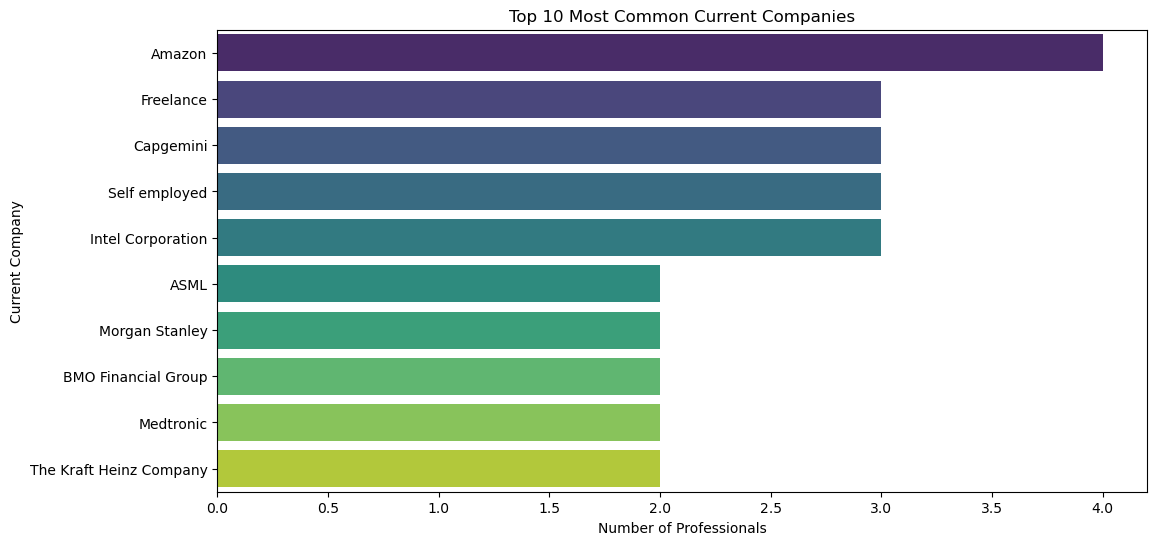

In [17]:
# Get the top 10 most common current companies
top_current_companies = df_cleaned['current_company_name'].value_counts().head(10)

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(y=top_current_companies.index, x=top_current_companies.values, palette='viridis')
plt.title('Top 10 Most Common Current Companies')
plt.xlabel('Number of Professionals')
plt.ylabel('Current Company')
plt.show()


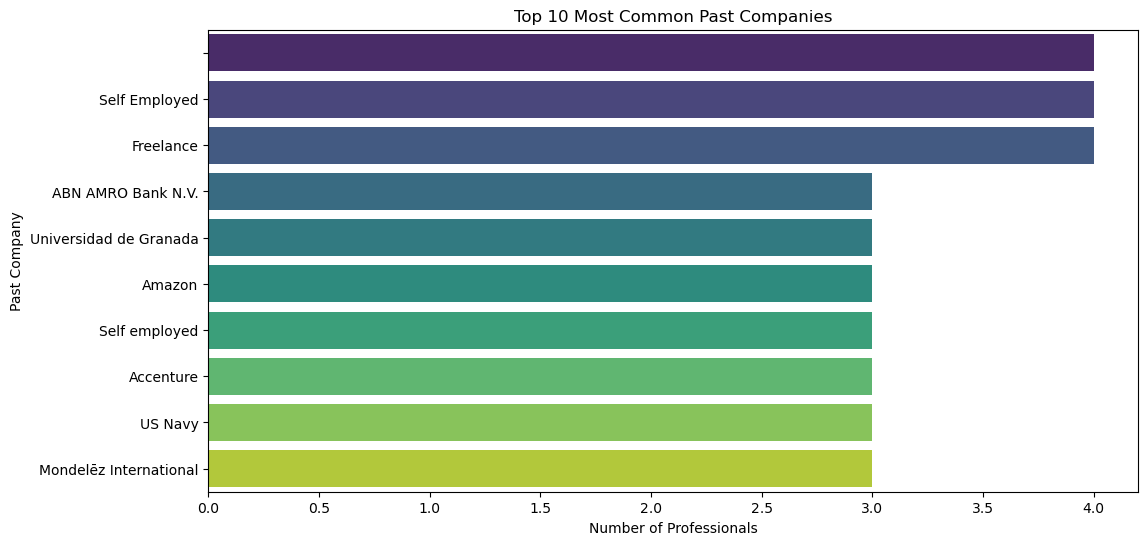

In [18]:
# Create a list of all past companies
all_past_companies = [company for sublist in df_cleaned['companies'] for company in sublist]

# Get the top 10 most common past companies
top_past_companies = pd.Series(all_past_companies).value_counts().head(10)

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(y=top_past_companies.index, x=top_past_companies.values, palette='viridis')
plt.title('Top 10 Most Common Past Companies')
plt.xlabel('Number of Professionals')
plt.ylabel('Past Company')
plt.show()


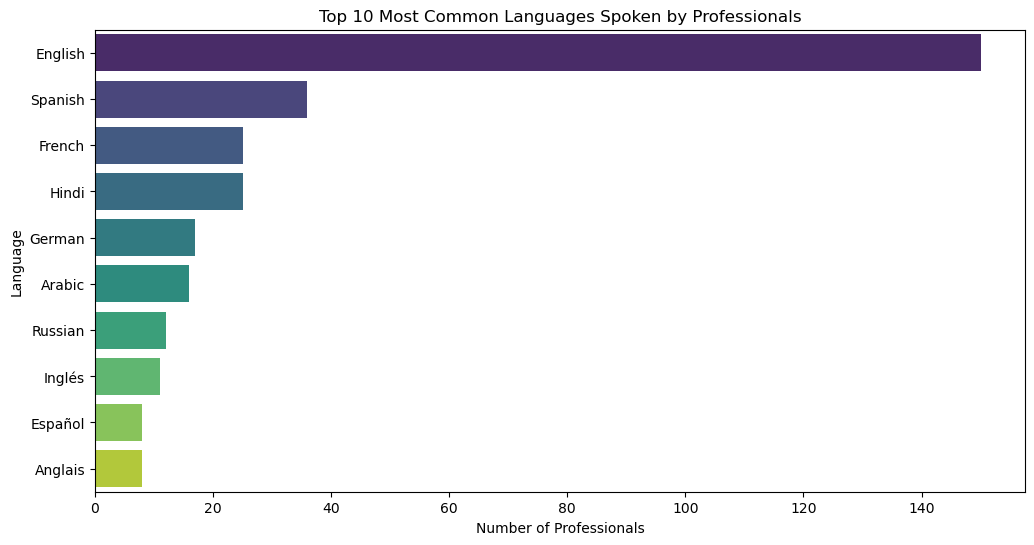

In [19]:
# Create a list of all languages
all_languages = [language for sublist in df_cleaned['languages'] for language in sublist]

# Get the top 10 most common languages
top_languages = pd.Series(all_languages).value_counts().head(10)

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(y=top_languages.index, x=top_languages.values, palette='viridis')
plt.title('Top 10 Most Common Languages Spoken by Professionals')
plt.xlabel('Number of Professionals')
plt.ylabel('Language')
plt.show()


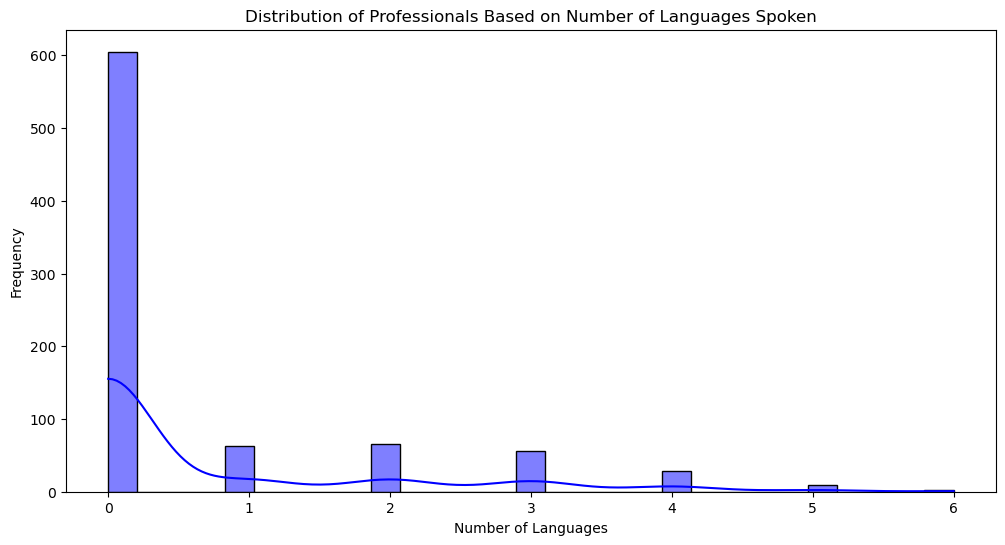

In [20]:
# Create a new column for the number of languages spoken by each professional
df_cleaned['num_languages'] = df_cleaned['languages'].apply(len)

# Create histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['num_languages'], kde=True, color='b')
plt.title('Distribution of Professionals Based on Number of Languages Spoken')
plt.xlabel('Number of Languages')
plt.ylabel('Frequency')
plt.show()


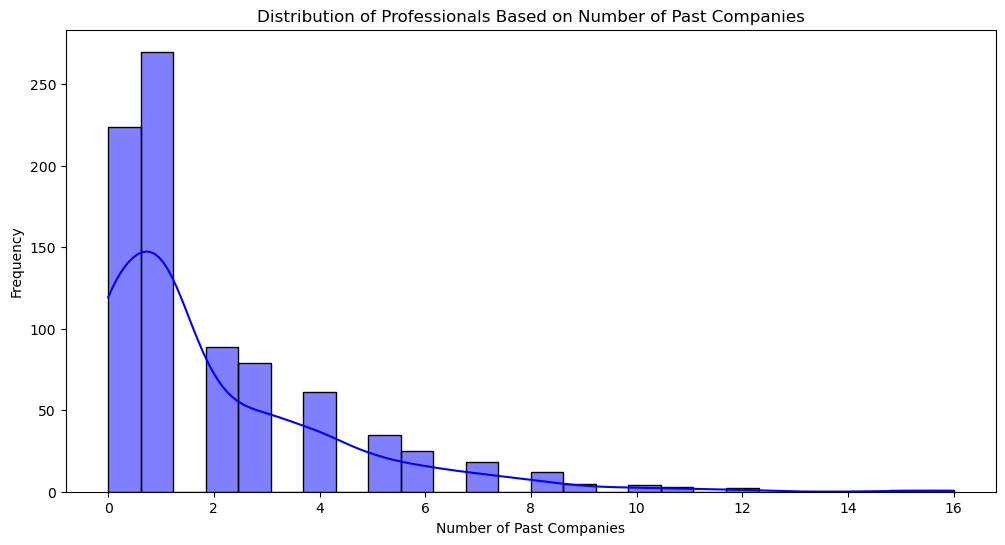

In [21]:
# Create a new column for the number of past companies where each professional has worked
df_cleaned['num_past_companies'] = df_cleaned['companies'].apply(len)

# Create histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['num_past_companies'], kde=True, color='b')
plt.title('Distribution of Professionals Based on Number of Past Companies')
plt.xlabel('Number of Past Companies')
plt.ylabel('Frequency')
plt.show()


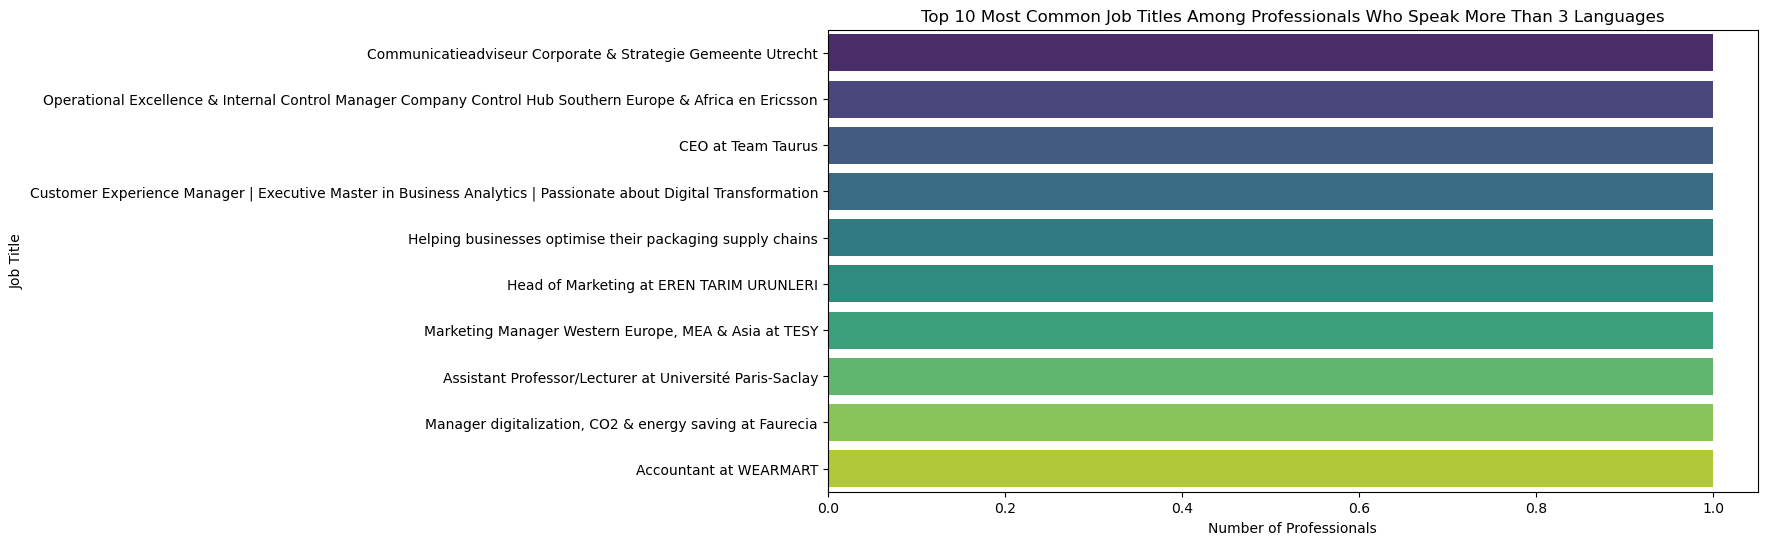

In [22]:
# Get the professionals who speak more than 3 languages
professionals_more_than_3_languages = df_cleaned[df_cleaned['num_languages'] > 3]

# Get the top 10 most common job titles among these professionals
top_titles_more_than_3_languages = professionals_more_than_3_languages['position'].value_counts().head(10)

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(y=top_titles_more_than_3_languages.index, x=top_titles_more_than_3_languages.values, palette='viridis')
plt.title('Top 10 Most Common Job Titles Among Professionals Who Speak More Than 3 Languages')
plt.xlabel('Number of Professionals')
plt.ylabel('Job Title')
plt.show()


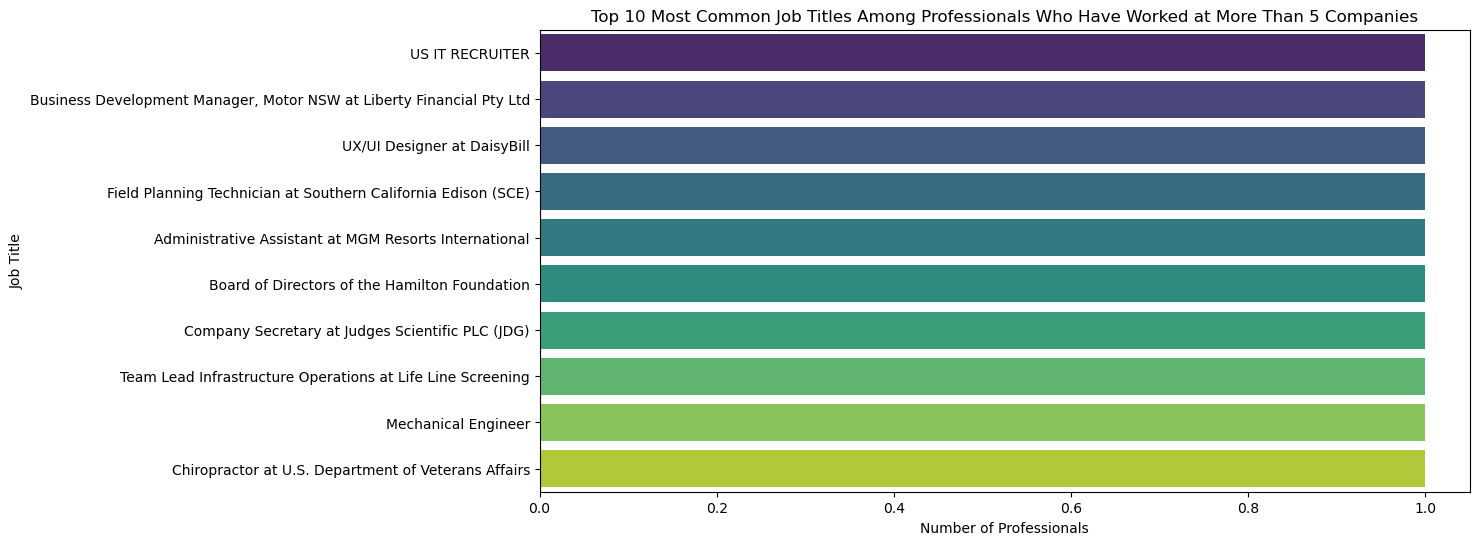

In [23]:
# Get the professionals who have worked at more than 5 companies
professionals_more_than_5_companies = df_cleaned[df_cleaned['num_past_companies'] > 5]

# Get the top 10 most common job titles among these professionals
top_titles_more_than_5_companies = professionals_more_than_5_companies['position'].value_counts().head(10)

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(y=top_titles_more_than_5_companies.index, x=top_titles_more_than_5_companies.values, palette='viridis')
plt.title('Top 10 Most Common Job Titles Among Professionals Who Have Worked at More Than 5 Companies')
plt.xlabel('Number of Professionals')
plt.ylabel('Job Title')
plt.show()


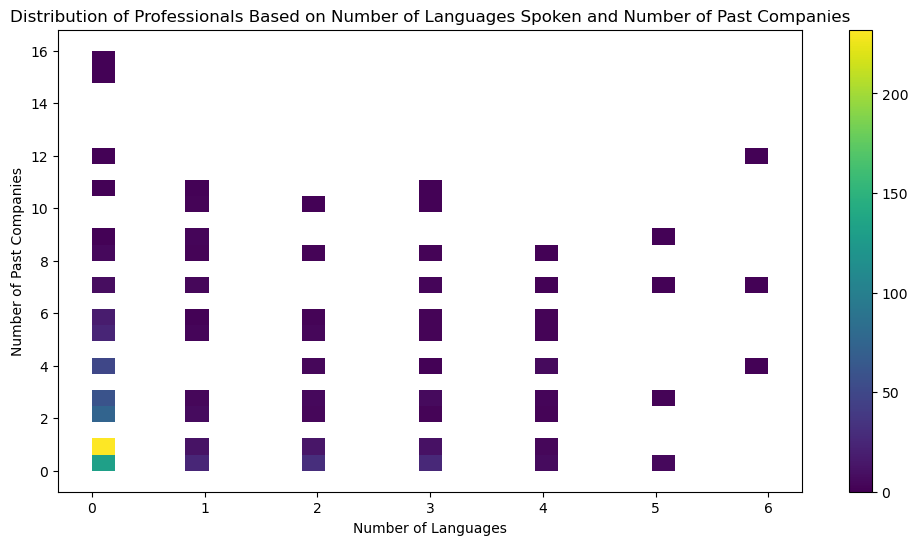

In [24]:
# Create a 2D histogram of the number of languages spoken and the number of past companies
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned, x='num_languages', y='num_past_companies', cbar=True, cmap='viridis')
plt.title('Distribution of Professionals Based on Number of Languages Spoken and Number of Past Companies')
plt.xlabel('Number of Languages')
plt.ylabel('Number of Past Companies')
plt.show()


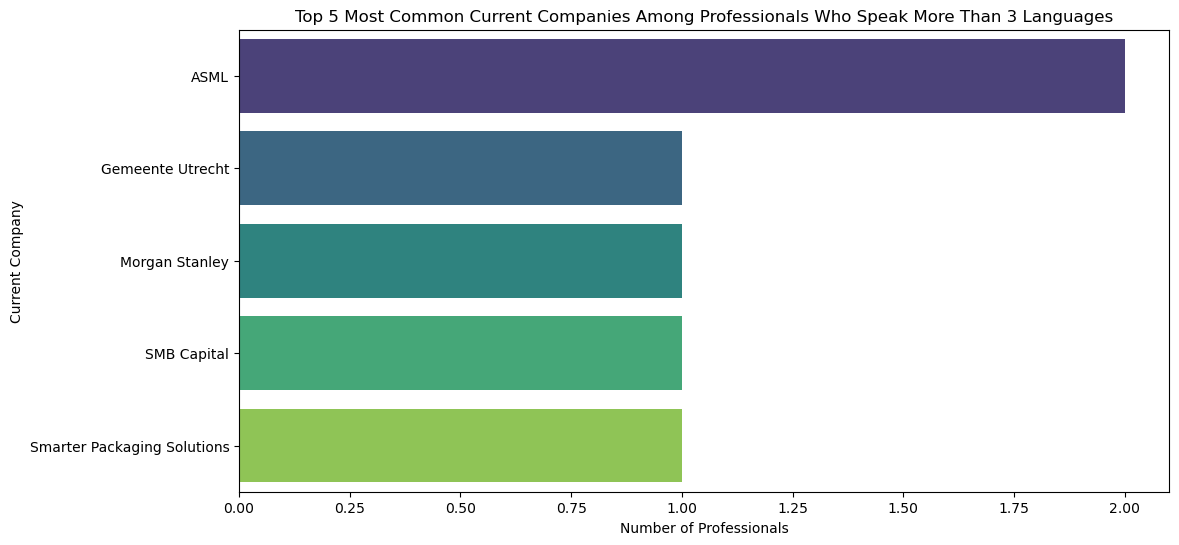

In [25]:
# Get the top 5 most common current companies among professionals who speak more than 3 languages
top_current_companies_more_than_3_languages = professionals_more_than_3_languages['current_company_name'].value_counts().head(5)

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(y=top_current_companies_more_than_3_languages.index, x=top_current_companies_more_than_3_languages.values, palette='viridis')
plt.title('Top 5 Most Common Current Companies Among Professionals Who Speak More Than 3 Languages')
plt.xlabel('Number of Professionals')
plt.ylabel('Current Company')
plt.show()


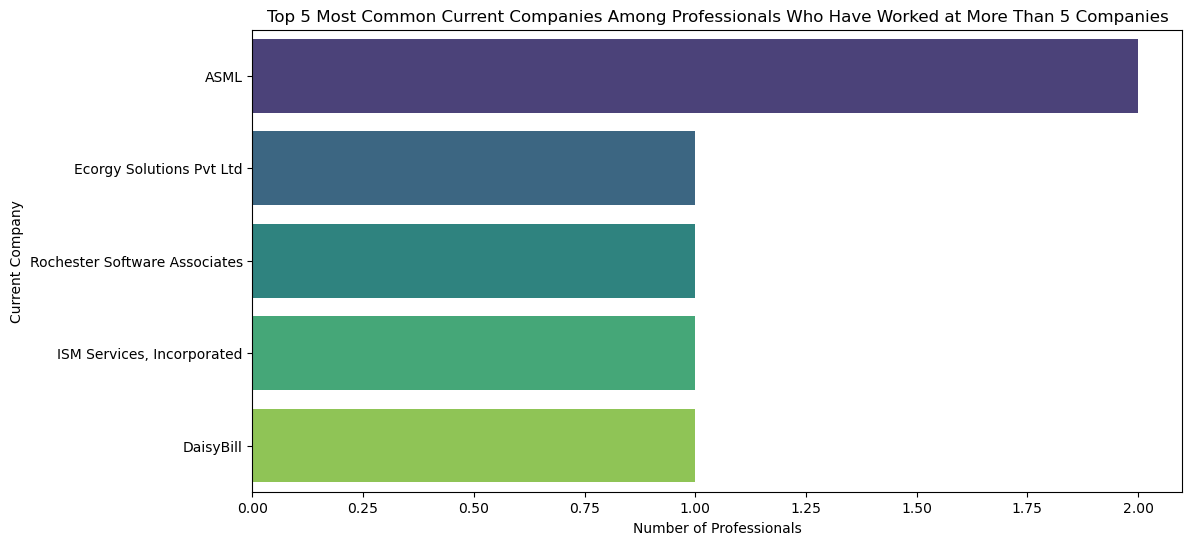

In [26]:
# Get the top 5 most common current companies among professionals who have worked at more than 5 companies
top_current_companies_more_than_5_companies = professionals_more_than_5_companies['current_company_name'].value_counts().head(5)

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(y=top_current_companies_more_than_5_companies.index, x=top_current_companies_more_than_5_companies.values, palette='viridis')
plt.title('Top 5 Most Common Current Companies Among Professionals Who Have Worked at More Than 5 Companies')
plt.xlabel('Number of Professionals')
plt.ylabel('Current Company')
plt.show()
